# Step 1: Data Loading and Understanding


In [59]:
import pandas as pd


file_path = './data/IMDB Dataset.csv'

data_frame = pd.read_csv(file_path, nrows=5000)
print('data_frame.shape: ', data_frame.shape)

data_frame.head()

data_frame.shape:  (5000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [60]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [61]:
data_frame.describe()

,review,sentiment
count,5000,5000
unique,4997,2
top,Quite what the producers of this appalling ada...,negative
freq,2,2532


Total number of Positive and Negative


data_frame['sentiment'].value_counts():  sentiment
negative    2532
positive    2468
Name: count, dtype: int64


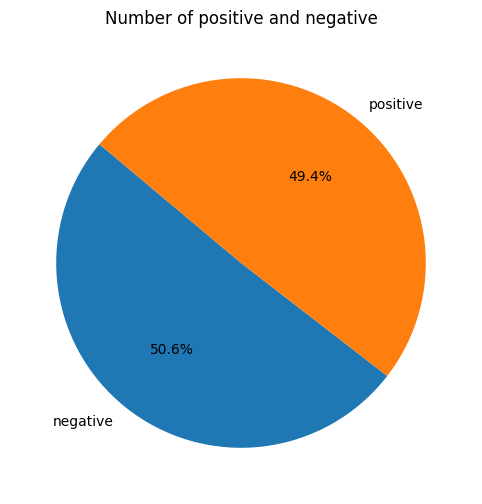

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

data_frame['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)

print("data_frame['sentiment'].value_counts(): ", data_frame['sentiment'].value_counts())

plt.title('Number of positive and negative')
plt.ylabel('')
plt.show()

# Text Preprocessing


Remove HTML tags using BeautifulSoup library


In [ ]:
from bs4 import BeautifulSoup

def remove_html_tags(html):
    beautiful_soup = BeautifulSoup(html, "html.parser")
    return beautiful_soup.get_text()    
    
data_frame['removed_html_review']= data_frame['review'].apply(lambda text: remove_html_tags(text))
data_frame

,review,sentiment,removed_html_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...,...,...
4995,An interesting slasher film with multiple susp...,negative,An interesting slasher film with multiple susp...
4996,i watched this series when it first came out i...,positive,i watched this series when it first came out i...
4997,Once again Jet Li brings his charismatic prese...,positive,Once again Jet Li brings his charismatic prese...
4998,"I rented this movie, after hearing Chris Gore ...",negative,"I rented this movie, after hearing Chris Gore ..."


### Convert all text to lowercase

### Remove stop words, punctuation, and special characters

### Apply tokenization using regex and stemming


In [64]:
import re
import string
import nltk 
from nltk import PorterStemmer

stopwords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation
ps = PorterStemmer()


def clean_text(text):
    text = "".join([word.lower() for word in text if word not in punctuation])
    token = re.split("\W+",text)
    token = [ps.stem(word) for word in token if word not in stopwords]
    return token
    
data_frame['clean_review'] = data_frame['review'].apply(lambda x: clean_text(x))

data_frame

,review,sentiment,removed_html_review,clean_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,"[one, review, mention, watch, 1, oz, episod, y..."
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...,"[wonder, littl, product, br, br, film, techniq..."
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,"[basic, there, famili, littl, boy, jake, think..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, mattei, love, time, money, visual, st..."
...,...,...,...,...
4995,An interesting slasher film with multiple susp...,negative,An interesting slasher film with multiple susp...,"[interest, slasher, film, multipl, suspectsbr,..."
4996,i watched this series when it first came out i...,positive,i watched this series when it first came out i...,"[watch, seri, first, came, 70si, 14, year, old..."
4997,Once again Jet Li brings his charismatic prese...,positive,Once again Jet Li brings his charismatic prese...,"[jet, li, bring, charismat, presenc, movi, scr..."
4998,"I rented this movie, after hearing Chris Gore ...",negative,"I rented this movie, after hearing Chris Gore ...","[rent, movi, hear, chri, gore, say, someth, ef..."
